In [12]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Dataset
The dataset is used in this case is called FordA, taken from the UCR repository. This dataset includes 3601 samples for training and 1320 samples for testing. Every timeseries in the dataset represents engine noise data collected through engine sensors. Target of this task is to automatically detect engine problems.

**Goal**: This data set contains samples with a length of 500 to measure motor door noise through a motor sensor, and the task is to classify whether the motor is having problems (+1) or not (-1) based on noise. The goal is to train an XGBoost classifier and evaluate the performance its capacity.

In [8]:
def read_data(file_name):
    data = np.loadtxt(file_name, delimiter='\t')
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)

x_train, y_train = read_data('FordA_TRAIN.tsv')
x_test, y_test = read_data('FordA_TEST.tsv')

print(f'Number of training samples: {len(y_train)}')
print(f'Number of test samples: {len(y_test)}')

Number of training samples: 3601
Number of test samples: 1320


### Visualize

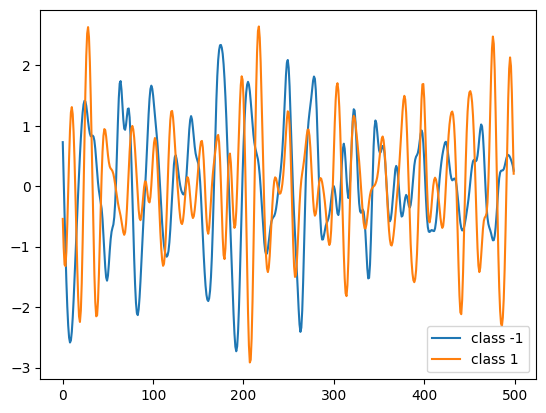

In [7]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))

plt.figure()
for c in classes:
    c_x_train = x_train[y_train == c]
    plt.plot(c_x_train[1], label='class ' + str(c))
plt.legend(loc='best')
plt.show()
plt.close()

### Train and evaluate model

In [9]:
# convert class -1 to 0 for binary classification
y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

In [10]:
model = XGBClassifier(n_estimators=200, random_state=42)
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [11]:
y_pred = model.predict(x_test)
print(f'Confusion matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Classification report: \n{classification_report(y_test, y_pred)}')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Confusion matrix: 
[[550 131]
 [139 500]]
Classification report: 
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       681
           1       0.79      0.78      0.79       639

    accuracy                           0.80      1320
   macro avg       0.80      0.80      0.80      1320
weighted avg       0.80      0.80      0.80      1320

Accuracy: 0.7954545454545454
